In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import torch
import json

# **Load and visualize the data**

In [0]:
# Pol
# Read Balanced train data set
pol_train_balanced = pd.read_csv("/content/gdrive/My Drive/HCLHackathon/Pol/pol_train-balanced.csv", delimiter='|')
pol_test_balanced = pd.read_csv("/content/gdrive/My Drive/HCLHackathon/Pol/pol_test-balanced.csv", delimiter='|')

In [0]:
pol_test_balanced_1 = pd.read_excel("/content/gdrive/My Drive/HCLHackathon/Pol/Sarcasm_dataset_without_label.xlsx", sheet_name="Sheet1")

In [5]:
pol_test_balanced_1.head()

Textual data for sarcasm detection  Your Predicted label
0  passengers praying uber just a hobby for elder...                   NaN
1          the top 10 workout songs for january 2018                   NaN
2  meryl streep looks exactly like the 'shrek' fa...                   NaN
3  couple just wants small ceremony in public par...                   NaN
4  terrified fda warns something making bananas b...                   NaN

In [6]:
pol_train_balanced.head()

7vq9q  c07jfvv c07jy05  1 0
0  7xdys  c07o37s c07o350  1 0
1  bln1z  c0ndefe c0ndajx  1 0
2  bm9yo  c0nh0jw c0nhdes  1 0
3  bpkof  c0nyigy c0ny03s  0 1
4  bpuo1  c0nzcjq c0nz11j  0 1

In [7]:
pol_test_balanced.head()

hqa1x  c1xiujs c1xj4e2  1 0
0  i0v01  c205da7 c201mb5  1 0
1  i6i1y  c21btxl c21bxjw  1 0
2  i77mp  c21hz0p c21jnd1  1 0
3  xie15  c5mw3ss c5muofa  1 0
4  xmaqj  c5nlo2y c5nz71q  0 1

In [8]:
#Check the column names
pol_train_balanced.columns

Index(['7vq9q', 'c07jfvv c07jy05', '1 0'], dtype='object')

In [9]:
pol_test_balanced.columns

Index(['hqa1x', 'c1xiujs c1xj4e2', '1 0'], dtype='object')

In [0]:
# Rename column names
pol_train_balanced.columns = ["Comment_ID", "Response_ID", "Sent"]

In [0]:
pol_test_balanced.columns = ["Comment_ID", "Response_ID", "Sent"]

In [12]:
# Check column names
pol_train_balanced.columns

Index(['Comment_ID', 'Response_ID', 'Sent'], dtype='object')

In [13]:
pol_test_balanced.columns

Index(['Comment_ID', 'Response_ID', 'Sent'], dtype='object')

In [0]:
# Response_ID split
pol_train_balanced['Response_ID_1'], pol_train_balanced['Response_ID_2'] = pol_train_balanced['Response_ID'].str.split(' ', 1).str

In [15]:
pol_train_balanced.head()

Comment_ID      Response_ID Sent Response_ID_1 Response_ID_2
0      7xdys  c07o37s c07o350  1 0       c07o37s       c07o350
1      bln1z  c0ndefe c0ndajx  1 0       c0ndefe       c0ndajx
2      bm9yo  c0nh0jw c0nhdes  1 0       c0nh0jw       c0nhdes
3      bpkof  c0nyigy c0ny03s  0 1       c0nyigy       c0ny03s
4      bpuo1  c0nzcjq c0nz11j  0 1       c0nzcjq       c0nz11j

In [16]:
pol_test_balanced['Response_ID_1'], pol_test_balanced['Response_ID_2'] = pol_test_balanced['Response_ID'].str.split(' ', 1).str
pol_test_balanced.head()

Comment_ID      Response_ID Sent Response_ID_1 Response_ID_2
0      i0v01  c205da7 c201mb5  1 0       c205da7       c201mb5
1      i6i1y  c21btxl c21bxjw  1 0       c21btxl       c21bxjw
2      i77mp  c21hz0p c21jnd1  1 0       c21hz0p       c21jnd1
3      xie15  c5mw3ss c5muofa  1 0       c5mw3ss       c5muofa
4      xmaqj  c5nlo2y c5nz71q  0 1       c5nlo2y       c5nz71q

In [0]:
# Sent column split
pol_train_balanced['Sent_1'], pol_train_balanced['Sent_2'] = pol_train_balanced['Sent'].str.split(' ', 1).str

In [18]:
pol_train_balanced.head()

Comment_ID      Response_ID Sent Response_ID_1 Response_ID_2 Sent_1 Sent_2
0      7xdys  c07o37s c07o350  1 0       c07o37s       c07o350      1      0
1      bln1z  c0ndefe c0ndajx  1 0       c0ndefe       c0ndajx      1      0
2      bm9yo  c0nh0jw c0nhdes  1 0       c0nh0jw       c0nhdes      1      0
3      bpkof  c0nyigy c0ny03s  0 1       c0nyigy       c0ny03s      0      1
4      bpuo1  c0nzcjq c0nz11j  0 1       c0nzcjq       c0nz11j      0      1

In [19]:
pol_test_balanced['Sent_1'], pol_test_balanced['Sent_2'] = pol_test_balanced['Sent'].str.split(' ', 1).str
pol_test_balanced.head()

Comment_ID      Response_ID Sent Response_ID_1 Response_ID_2 Sent_1 Sent_2
0      i0v01  c205da7 c201mb5  1 0       c205da7       c201mb5      1      0
1      i6i1y  c21btxl c21bxjw  1 0       c21btxl       c21bxjw      1      0
2      i77mp  c21hz0p c21jnd1  1 0       c21hz0p       c21jnd1      1      0
3      xie15  c5mw3ss c5muofa  1 0       c5mw3ss       c5muofa      1      0
4      xmaqj  c5nlo2y c5nz71q  0 1       c5nlo2y       c5nz71q      0      1

In [20]:
# Splitting the data to combine
df1 = pol_train_balanced[['Response_ID_1','Sent_1']]
df1.columns = ['Response_ID','Sent']
df1.head()

Response_ID Sent
0     c07o37s    1
1     c0ndefe    1
2     c0nh0jw    1
3     c0nyigy    0
4     c0nzcjq    0

In [21]:
df2 = pol_train_balanced[['Response_ID_2','Sent_2']]
df2.columns = ['Response_ID','Sent']
df2.head()

Response_ID Sent
0     c07o350    0
1     c0ndajx    0
2     c0nhdes    0
3     c0ny03s    1
4     c0nz11j    1

In [22]:
# Appending both the data frames
frames = [df1, df2]
df_pol_train_balanced = pd.concat(frames)
df_pol_train_balanced.head()

Response_ID Sent
0     c07o37s    1
1     c0ndefe    1
2     c0nh0jw    1
3     c0nyigy    0
4     c0nzcjq    0

In [23]:
# Checking both the data frames has same text
df2.tail()

Response_ID Sent
6828     dfo8p3c    0
6829     dfo8uhn    0
6830     dfo3g3q    0
6831     dfom6aq    0
6832     dfopsjq    0

In [24]:
df_pol_train_balanced.tail()

Response_ID Sent
6828     dfo8p3c    0
6829     dfo8uhn    0
6830     dfo3g3q    0
6831     dfom6aq    0
6832     dfopsjq    0

In [25]:
# Checking shapes - Verifying data is cpoied properly
df1.shape

(6833, 2)

In [26]:
df2.shape

(6833, 2)

In [27]:
df_pol_train_balanced.shape

(13666, 2)

In [28]:
# Check the size
6833 * 2

13666

In [29]:
df11 = pol_test_balanced[['Response_ID_1','Sent_1']]
df11.columns = ['Response_ID','Sent']

df21 = pol_test_balanced[['Response_ID_2','Sent_2']]
df21.columns = ['Response_ID','Sent']

frames1 = [df11, df21]
df_pol_test_balanced = pd.concat(frames1)
df_pol_test_balanced.head()

Response_ID Sent
0     c205da7    1
1     c21btxl    1
2     c21hz0p    1
3     c5mw3ss    1
4     c5nlo2y    0

In [30]:
df11.shape

(1702, 2)

In [31]:
df21.shape

(1702, 2)

In [32]:
df_pol_test_balanced.shape

(3404, 2)

In [0]:
# Read JSON File 
import json
with open("/content/gdrive/My Drive/HCLHackathon/Pol/pol_comments.json") as datafile:
    data = json.load(datafile)
jsondf = pd.DataFrame(data)

In [34]:
jsondf.head()

7uxqr  ...            dfo8us6
text    Nancyt Pelosi messes up.. 500 Million Jobs los...  ...  Ohh thats bad....
author                                            Fishbum  ...        Quinnjester
score                                                   0  ...                  1
ups                                                     2  ...                 -1
downs                                                   4  ...                 -1

[5 rows x 579790 columns]

In [0]:
pol_jdf = jsondf.transpose()

In [36]:
pol_jdf.columns

Index(['text', 'author', 'score', 'ups', 'downs', 'date', 'created_utc',
       'subreddit'],
      dtype='object')

In [37]:
pol_jdf.head()

text  ... subreddit
7uxqr    Nancyt Pelosi messes up.. 500 Million Jobs los...  ...  politics
7vewt                 Netflix CEO: "Please raise my taxes"  ...  politics
7vq9q          The Six Million Dead Jews of World War ONE!  ...  politics
c07jfvv  Oh right, *both* wars were just jewish conspir...  ...  politics
7w0as    GOP says it is necessary to spend my tax dolla...  ...  politics

[5 rows x 8 columns]

In [0]:
pol_jdf.index.name = "Response_ID"

In [39]:
pol_jdf.head()

text  ... subreddit
Response_ID                                                     ...          
7uxqr        Nancyt Pelosi messes up.. 500 Million Jobs los...  ...  politics
7vewt                     Netflix CEO: "Please raise my taxes"  ...  politics
7vq9q              The Six Million Dead Jews of World War ONE!  ...  politics
c07jfvv      Oh right, *both* wars were just jewish conspir...  ...  politics
7w0as        GOP says it is necessary to spend my tax dolla...  ...  politics

[5 rows x 8 columns]

In [0]:
# Combine the data
pol_comb = pd.merge(df_pol_train_balanced, pol_jdf, left_on="Response_ID", right_on="Response_ID")

In [41]:
pol_comb.head()

Response_ID Sent  ... created_utc subreddit
0     c07o37s    1  ...  1234642047  politics
1     c0ndefe    1  ...  1270224074  politics
2     c0nh0jw    1  ...  1270404022  politics
3     c0nyigy    0  ...  1271073071  politics
4     c0nzcjq    0  ...  1271101055  politics

[5 rows x 10 columns]

In [42]:
# Combine test data
polb_test_comb = pd.merge(df_pol_test_balanced, pol_jdf, left_on="Response_ID", right_on="Response_ID")
polb_test_comb.head()

Response_ID Sent  ... created_utc subreddit
0     c205da7    1  ...  1308265424  politics
1     c21btxl    1  ...  1308787657  politics
2     c21hz0p    1  ...  1308859118  politics
3     c5mw3ss    1  ...  1343874751  politics
4     c5nlo2y    0  ...  1344003871  politics

[5 rows x 10 columns]

In [0]:
# Splitting words with space and counting the words
#polb_reviews = pol_comb.loc[:, "text"].astype(str)
polb_reviews = pol_comb.loc[:, "text"].to_string(index=False)
polb_labels = pol_comb.loc[:,"Sent"].to_string(index=False)

In [44]:
polb_reviews

'                              Good luck with that.\n And this is exactly why I approve of death pan...\n      This is pure xenophobia against Vaticanians!\n Clinton\'s budget surpluses = the post-CW Peace...\n Teabagging apperently just the tip of the iceberg\n Who ever heard of a volcano causing problems f...\n             It\'s to enhance our freedom of speech\n yah, at that point they don\'t even count as pe...\n As a person the cop wouldn\'t of opened his fuc...\n It doesn\'t but you cannot get upvotes unless y...\n kind of hard to give anal sex an even worse na...\n Because if we don\'t fight the wars, the terror...\n                                            u mad?\n                             Where are *our* jobs?\n Scum tends to stay near the top, while the goo...\n What you can\'t see is that they\'re jerking eac...\n Those must be some pretty tough soldiers to ha...\n                             "Let\'s stone her!!!!"\n       it sets a precedent, and the battle\'s lost.\n 

In [45]:
polb_labels

' 1\n 1\n 1\n 0\n 0\n 1\n 1\n 1\n 0\n 0\n 1\n 1\n 0\n 0\n 0\n 0\n 1\n 1\n 0\n 1\n 1\n 0\n 1\n 1\n 1\n 1\n 1\n 1\n 0\n 0\n 1\n 0\n 1\n 1\n 1\n 1\n 1\n 1\n 0\n 1\n 0\n 0\n 1\n 0\n 1\n 0\n 0\n 0\n 0\n 1\n 0\n 1\n 1\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 1\n 1\n 0\n 0\n 1\n 0\n 1\n 0\n 1\n 0\n 1\n 0\n 1\n 0\n 1\n 1\n 0\n 1\n 0\n 1\n 1\n 0\n 0\n 0\n 1\n 1\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 1\n 0\n 0\n 1\n 1\n 1\n 1\n 0\n 1\n 0\n 0\n 1\n 0\n 1\n 0\n 1\n 0\n 1\n 1\n 1\n 1\n 0\n 0\n 1\n 1\n 1\n 1\n 1\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 1\n 1\n 1\n 1\n 1\n 0\n 1\n 1\n 0\n 0\n 1\n 1\n 0\n 1\n 1\n 1\n 1\n 1\n 1\n 1\n 0\n 0\n 0\n 1\n 1\n 0\n 0\n 1\n 0\n 0\n 0\n 1\n 0\n 1\n 1\n 0\n 1\n 1\n 0\n 0\n 1\n 1\n 1\n 1\n 1\n 0\n 1\n 0\n 1\n 1\n 0\n 0\n 1\n 0\n 1\n 1\n 1\n 0\n 0\n 0\n 0\n 0\n 1\n 1\n 0\n 1\n 0\n 1\n 0\n 0\n 1\n 1\n 0\n 0\n 1\n 0\n 0\n 1\n 1\n 1\n 0\n 0\n 1\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 1\n 0\n 1\n 1\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 1\n 1\n 1\n 0\n 1\n 0\n 0\n 1\n 1\n 1\

In [46]:
type(polb_reviews)

str

In [0]:
polb_test_reviews = polb_test_comb.loc[:, "text"].to_string(index=False)
polb_test_labels = polb_test_comb.loc[:,"Sent"].to_string(index=False)

In [0]:

polb_test_reviews_1 = pol_test_balanced_1.loc[:, "Textual data for sarcasm detection"].to_string(index=False)

In [49]:
polb_test_reviews_1

" passengers praying uber just a hobby for elder...\n         the top 10 workout songs for january 2018\n meryl streep looks exactly like the 'shrek' fa...\n couple just wants small ceremony in public par...\n terrified fda warns something making bananas b...\n                         aspen ideas festival 2015\n this labor day, let's boost opportunity in eve...\n taking your startup public is fraught with neg...\n     al franken will leave senate in early january\n donald trump vows to take travel ban to the su...\n hackers target russian olympic whistleblower, ...\n underserved kids learn a year's worth of math ...\n 'stranger pugs' is the greatest thing to happe...\n morgan freeman's snapchat fail is hilariously ...\n               social media etiquette for weddings\n princess charlotte has maybe the most fashiona...\n teddy bear feels terrible for sparking 'what a...\n man flirting with girl at party can't wait to ...\n mysterious man in parking lot threatens to har...\n obama unde

In [50]:
polb_test_reviews

' TIL, voluntary slavery by starving people who\'...\n That\'d be great if only Ron Paul wasn\'t A CHRI...\n           But, but...lowering taxes creates jobs!\n                                           WHORES!\n Well, yeah, but his plan would funnel money to...\n File under "How the right wing wants to keep g...\n              He has great respect for the office.\n I like Romney\'s advice better - "borrow from y...\n Just another responsible gun owner excercising...\n                                   What oil spill?\n It\'s a city built on debts and booze... probably.\n                 Cause the whole system is rigged.\n Thank God Congress is there to look out for ou...\n              I have to deal with 64 all the time.\n                     Was he shootin\' at some food?\n But we can just go to the ER, they have to tap...\n Guys... Guys I know the answer... Lets... doub...\n **I don\'t remember saying anything about this*...\n                                     -Pope Francis\n Woo

In [51]:
polb_test_labels

' 1\n 1\n 1\n 1\n 0\n 1\n 1\n 1\n 1\n 1\n 0\n 0\n 1\n 0\n 0\n 1\n 1\n 0\n 0\n 0\n 1\n 1\n 0\n 1\n 0\n 0\n 0\n 0\n 1\n 1\n 1\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 1\n 1\n 1\n 1\n 1\n 1\n 1\n 0\n 1\n 1\n 1\n 1\n 0\n 1\n 1\n 1\n 1\n 0\n 1\n 1\n 0\n 0\n 1\n 0\n 0\n 1\n 1\n 0\n 1\n 1\n 0\n 0\n 0\n 1\n 1\n 1\n 0\n 1\n 1\n 1\n 1\n 0\n 1\n 0\n 0\n 0\n 1\n 0\n 1\n 1\n 1\n 1\n 0\n 0\n 1\n 0\n 1\n 1\n 0\n 1\n 1\n 0\n 1\n 0\n 1\n 1\n 1\n 1\n 0\n 0\n 1\n 1\n 0\n 0\n 1\n 1\n 1\n 0\n 0\n 1\n 0\n 0\n 1\n 0\n 0\n 1\n 1\n 1\n 1\n 1\n 1\n 1\n 0\n 1\n 1\n 1\n 1\n 0\n 1\n 1\n 0\n 1\n 1\n 0\n 1\n 0\n 0\n 0\n 1\n 1\n 1\n 0\n 0\n 1\n 1\n 0\n 0\n 0\n 0\n 1\n 0\n 1\n 1\n 1\n 0\n 0\n 1\n 0\n 0\n 1\n 0\n 1\n 1\n 1\n 1\n 0\n 0\n 1\n 1\n 0\n 0\n 1\n 1\n 0\n 0\n 0\n 1\n 1\n 1\n 1\n 0\n 1\n 0\n 1\n 0\n 1\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 1\n 0\n 0\n 1\n 0\n 1\n 0\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 1\n 0\n 0\n 0\n 1\n 1\n 0\n 0\n 1\n 0\n 0\n 0\n 1\n 1\n 0\n 0\n 1\n 0\n 0\n 0\n 1\n 0\n 1\n 1\n 0\n 1\n 1\n 1\n 0\n 0\n 0\n 1\n 0\n 0\

In [52]:
polb_reviews = polb_reviews.lower()
polb_reviews

'                              good luck with that.\n and this is exactly why i approve of death pan...\n      this is pure xenophobia against vaticanians!\n clinton\'s budget surpluses = the post-cw peace...\n teabagging apperently just the tip of the iceberg\n who ever heard of a volcano causing problems f...\n             it\'s to enhance our freedom of speech\n yah, at that point they don\'t even count as pe...\n as a person the cop wouldn\'t of opened his fuc...\n it doesn\'t but you cannot get upvotes unless y...\n kind of hard to give anal sex an even worse na...\n because if we don\'t fight the wars, the terror...\n                                            u mad?\n                             where are *our* jobs?\n scum tends to stay near the top, while the goo...\n what you can\'t see is that they\'re jerking eac...\n those must be some pretty tough soldiers to ha...\n                             "let\'s stone her!!!!"\n       it sets a precedent, and the battle\'s lost.\n 

In [53]:
polb_test_reviews = polb_test_reviews.lower()
polb_test_reviews

' til, voluntary slavery by starving people who\'...\n that\'d be great if only ron paul wasn\'t a chri...\n           but, but...lowering taxes creates jobs!\n                                           whores!\n well, yeah, but his plan would funnel money to...\n file under "how the right wing wants to keep g...\n              he has great respect for the office.\n i like romney\'s advice better - "borrow from y...\n just another responsible gun owner excercising...\n                                   what oil spill?\n it\'s a city built on debts and booze... probably.\n                 cause the whole system is rigged.\n thank god congress is there to look out for ou...\n              i have to deal with 64 all the time.\n                     was he shootin\' at some food?\n but we can just go to the er, they have to tap...\n guys... guys i know the answer... lets... doub...\n **i don\'t remember saying anything about this*...\n                                     -pope francis\n woo

In [54]:
polb_test_reviews_1 = polb_test_reviews_1.lower()
polb_test_reviews_1

" passengers praying uber just a hobby for elder...\n         the top 10 workout songs for january 2018\n meryl streep looks exactly like the 'shrek' fa...\n couple just wants small ceremony in public par...\n terrified fda warns something making bananas b...\n                         aspen ideas festival 2015\n this labor day, let's boost opportunity in eve...\n taking your startup public is fraught with neg...\n     al franken will leave senate in early january\n donald trump vows to take travel ban to the su...\n hackers target russian olympic whistleblower, ...\n underserved kids learn a year's worth of math ...\n 'stranger pugs' is the greatest thing to happe...\n morgan freeman's snapchat fail is hilariously ...\n               social media etiquette for weddings\n princess charlotte has maybe the most fashiona...\n teddy bear feels terrible for sparking 'what a...\n man flirting with girl at party can't wait to ...\n mysterious man in parking lot threatens to har...\n obama unde

In [55]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [56]:
polb_all_text = ''.join([c for c in polb_reviews if c not in punctuation])
polb_all_text

'                              good luck with that\n and this is exactly why i approve of death pan\n      this is pure xenophobia against vaticanians\n clintons budget surpluses  the postcw peace\n teabagging apperently just the tip of the iceberg\n who ever heard of a volcano causing problems f\n             its to enhance our freedom of speech\n yah at that point they dont even count as pe\n as a person the cop wouldnt of opened his fuc\n it doesnt but you cannot get upvotes unless y\n kind of hard to give anal sex an even worse na\n because if we dont fight the wars the terror\n                                            u mad\n                             where are our jobs\n scum tends to stay near the top while the goo\n what you cant see is that theyre jerking eac\n those must be some pretty tough soldiers to ha\n                             lets stone her\n       it sets a precedent and the battles lost\n                                    capitalism ftw\n im sorry but bombing

In [57]:
from spacy.lang.en import English
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

#  "nlp" Object is used to create documents with linguistic annotations.
my_doc = nlp(polb_all_text)

# Create list of word tokens
polb_token_list = []
for token in my_doc:
    polb_token_list.append(token.text)

from spacy.lang.en.stop_words import STOP_WORDS

# Create list of word tokens after removing stopwords
polb_filtered_sentence =[] 

for word in polb_token_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        polb_filtered_sentence.append(word) 
print(polb_token_list)
print(polb_filtered_sentence) 

['                              ', 'good', 'luck', 'with', 'that', '\n ', 'and', 'this', 'is', 'exactly', 'why', 'i', 'approve', 'of', 'death', 'pan', '\n      ', 'this', 'is', 'pure', 'xenophobia', 'against', 'vaticanians', '\n ', 'clintons', 'budget', 'surpluses', ' ', 'the', 'postcw', 'peace', '\n ', 'teabagging', 'apperently', 'just', 'the', 'tip', 'of', 'the', 'iceberg', '\n ', 'who', 'ever', 'heard', 'of', 'a', 'volcano', 'causing', 'problems', 'f', '\n             ', 'its', 'to', 'enhance', 'our', 'freedom', 'of', 'speech', '\n ', 'yah', 'at', 'that', 'point', 'they', 'do', 'nt', 'even', 'count', 'as', 'pe', '\n ', 'as', 'a', 'person', 'the', 'cop', 'would', 'nt', 'of', 'opened', 'his', 'fuc', '\n ', 'it', 'does', 'nt', 'but', 'you', 'can', 'not', 'get', 'upvotes', 'unless', 'y', '\n ', 'kind', 'of', 'hard', 'to', 'give', 'anal', 'sex', 'an', 'even', 'worse', 'na', '\n ', 'because', 'if', 'we', 'do', 'nt', 'fight', 'the', 'wars', 'the', 'terror', '\n                             

In [58]:
polb_test_all_text = ''.join([c for c in polb_test_reviews if c not in punctuation])
polb_test_all_text

' til voluntary slavery by starving people who\n thatd be great if only ron paul wasnt a chri\n           but butlowering taxes creates jobs\n                                           whores\n well yeah but his plan would funnel money to\n file under how the right wing wants to keep g\n              he has great respect for the office\n i like romneys advice better  borrow from y\n just another responsible gun owner excercising\n                                   what oil spill\n its a city built on debts and booze probably\n                 cause the whole system is rigged\n thank god congress is there to look out for ou\n              i have to deal with 64 all the time\n                     was he shootin at some food\n but we can just go to the er they have to tap\n guys guys i know the answer lets doub\n i dont remember saying anything about this\n                                     pope francis\n wooooow this is the first positive thing my st\n it almost sounds like they are ac

In [60]:
polb_test_1_all_text = ''.join([c for c in polb_test_reviews_1 if c not in punctuation])
polb_test_1_all_text

' passengers praying uber just a hobby for elder\n         the top 10 workout songs for january 2018\n meryl streep looks exactly like the shrek fa\n couple just wants small ceremony in public par\n terrified fda warns something making bananas b\n                         aspen ideas festival 2015\n this labor day lets boost opportunity in eve\n taking your startup public is fraught with neg\n     al franken will leave senate in early january\n donald trump vows to take travel ban to the su\n hackers target russian olympic whistleblower \n underserved kids learn a years worth of math \n stranger pugs is the greatest thing to happe\n morgan freemans snapchat fail is hilariously \n               social media etiquette for weddings\n princess charlotte has maybe the most fashiona\n teddy bear feels terrible for sparking what a\n man flirting with girl at party cant wait to \n mysterious man in parking lot threatens to har\n obama under fire for playing tball during vie\n this unorthodox gu

In [59]:
from spacy.lang.en import English
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

#  "nlp" Object is used to create documents with linguistic annotations.
my_doc = nlp(polb_test_all_text)

# Create list of word tokens
polb_test_token_list = []
for token in my_doc:
    polb_test_token_list.append(token.text)

from spacy.lang.en.stop_words import STOP_WORDS

# Create list of word tokens after removing stopwords
polb_test_filtered_sentence =[] 

for word in polb_test_token_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        polb_test_filtered_sentence.append(word) 
print(polb_test_token_list)
print(polb_test_filtered_sentence) 

[' ', 'til', 'voluntary', 'slavery', 'by', 'starving', 'people', 'who', '\n ', 'that', 'd', 'be', 'great', 'if', 'only', 'ron', 'paul', 'was', 'nt', 'a', 'chri', '\n           ', 'but', 'butlowering', 'taxes', 'creates', 'jobs', '\n                                           ', 'whores', '\n ', 'well', 'yeah', 'but', 'his', 'plan', 'would', 'funnel', 'money', 'to', '\n ', 'file', 'under', 'how', 'the', 'right', 'wing', 'wants', 'to', 'keep', 'g', '\n              ', 'he', 'has', 'great', 'respect', 'for', 'the', 'office', '\n ', 'i', 'like', 'romneys', 'advice', 'better', ' ', 'borrow', 'from', 'y', '\n ', 'just', 'another', 'responsible', 'gun', 'owner', 'excercising', '\n                                   ', 'what', 'oil', 'spill', '\n ', 'its', 'a', 'city', 'built', 'on', 'debts', 'and', 'booze', 'probably', '\n                 ', 'cause', 'the', 'whole', 'system', 'is', 'rigged', '\n ', 'thank', 'god', 'congress', 'is', 'there', 'to', 'look', 'out', 'for', 'ou', '\n              ', 

In [62]:
from spacy.lang.en import English
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

#  "nlp" Object is used to create documents with linguistic annotations.
my_doc = nlp(polb_test_1_all_text)

# Create list of word tokens
polb_test1_token_list = []
for token in my_doc:
    polb_test1_token_list.append(token.text)

from spacy.lang.en.stop_words import STOP_WORDS

# Create list of word tokens after removing stopwords
polb_test1_filtered_sentence =[] 

for word in polb_test1_token_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        polb_test1_filtered_sentence.append(word) 
print(polb_test1_token_list)
print(polb_test1_filtered_sentence) 

[' ', 'passengers', 'praying', 'uber', 'just', 'a', 'hobby', 'for', 'elder', '\n         ', 'the', 'top', '10', 'workout', 'songs', 'for', 'january', '2018', '\n ', 'meryl', 'streep', 'looks', 'exactly', 'like', 'the', 'shrek', 'fa', '\n ', 'couple', 'just', 'wants', 'small', 'ceremony', 'in', 'public', 'par', '\n ', 'terrified', 'fda', 'warns', 'something', 'making', 'bananas', 'b', '\n                         ', 'aspen', 'ideas', 'festival', '2015', '\n ', 'this', 'labor', 'day', 'lets', 'boost', 'opportunity', 'in', 'eve', '\n ', 'taking', 'your', 'startup', 'public', 'is', 'fraught', 'with', 'neg', '\n     ', 'al', 'franken', 'will', 'leave', 'senate', 'in', 'early', 'january', '\n ', 'donald', 'trump', 'vows', 'to', 'take', 'travel', 'ban', 'to', 'the', 'su', '\n ', 'hackers', 'target', 'russian', 'olympic', 'whistleblower', '\n ', 'underserved', 'kids', 'learn', 'a', 'years', 'worth', 'of', 'math', '\n ', 'stranger', 'pugs', 'is', 'the', 'greatest', 'thing', 'to', 'happe', '\n ',

In [68]:
import en_core_web_sm
nlp = en_core_web_sm.load()
polb_lemma_word = []
doc = nlp(str(polb_filtered_sentence))
for token in doc:
    polb_lemma_word.append(token.lemma_)
polb_lemma_word

['[',
 "'",
 '                             ',
 "'",
 ',',
 "'",
 'good',
 "'",
 ',',
 "'",
 'luck',
 "'",
 ',',
 "'",
 '\\n',
 "'",
 ',',
 "'",
 'exactly',
 "'",
 ',',
 "'",
 'approve',
 "'",
 ',',
 "'",
 'death',
 "'",
 ',',
 "'",
 'pan',
 "'",
 ',',
 "'",
 '\\n',
 '     ',
 "'",
 ',',
 "'",
 'pure',
 "'",
 ',',
 "'",
 'xenophobia',
 "'",
 ',',
 "'",
 'vaticanian',
 "'",
 ',',
 "'",
 '\\n',
 "'",
 ',',
 "'",
 'clinton',
 "'",
 ',',
 "'",
 'budget',
 "'",
 ',',
 "'",
 'surplus',
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 'postcw',
 "'",
 ',',
 "'",
 'peace',
 "'",
 ',',
 "'",
 '\\n',
 "'",
 ',',
 "'",
 'teabagge',
 "'",
 ',',
 "'",
 'apperently',
 "'",
 ',',
 "'",
 'tip',
 "'",
 ',',
 "'",
 'iceberg',
 "'",
 ',',
 "'",
 '\\n',
 "'",
 ',',
 "'",
 'hear',
 "'",
 ',',
 "'",
 'volcano',
 "'",
 ',',
 "'",
 'cause',
 "'",
 ',',
 "'",
 'problem',
 "'",
 ',',
 "'",
 'f',
 "'",
 ',',
 "'",
 '\\n',
 '            ',
 "'",
 ',',
 "'",
 'enhance',
 "'",
 ',',
 "'",
 'freedom',
 "'",
 ',',
 "'",
 'speech'

In [69]:
polb_reviews_split = str(polb_lemma_word).split('\\n')
print ('Number of reviews :', len(polb_reviews_split))
polb_reviews_split[0:5]

Number of reviews : 13666


['[\'[\', "\'", \'                             \', "\'", \',\', "\'", \'good\', "\'", \',\', "\'", \'luck\', "\'", \',\', "\'", \'\\',
 '\', "\'", \',\', "\'", \'exactly\', "\'", \',\', "\'", \'approve\', "\'", \',\', "\'", \'death\', "\'", \',\', "\'", \'pan\', "\'", \',\', "\'", \'\\',
 '\', \'     \', "\'", \',\', "\'", \'pure\', "\'", \',\', "\'", \'xenophobia\', "\'", \',\', "\'", \'vaticanian\', "\'", \',\', "\'", \'\\',
 '\', "\'", \',\', "\'", \'clinton\', "\'", \',\', "\'", \'budget\', "\'", \',\', "\'", \'surplus\', "\'", \',\', "\'", "\'", \',\', "\'", \'postcw\', "\'", \',\', "\'", \'peace\', "\'", \',\', "\'", \'\\',
 '\', "\'", \',\', "\'", \'teabagge\', "\'", \',\', "\'", \'apperently\', "\'", \',\', "\'", \'tip\', "\'", \',\', "\'", \'iceberg\', "\'", \',\', "\'", \'\\']

In [70]:
nlp = en_core_web_sm.load()
polb_test_lemma_word = []
doc = nlp(str(polb_test_filtered_sentence))
for token in doc:
    polb_test_lemma_word.append(token.lemma_)
polb_test_lemma_word

['[',
 "'",
 "'",
 ',',
 "'",
 'til',
 "'",
 ',',
 "'",
 'voluntary',
 "'",
 ',',
 "'",
 'slavery',
 "'",
 ',',
 "'",
 'starve',
 "'",
 ',',
 "'",
 'people',
 "'",
 ',',
 "'",
 '\\n',
 "'",
 ',',
 "'",
 'd',
 "'",
 ',',
 "'",
 'great',
 "'",
 ',',
 "'",
 'ron',
 "'",
 ',',
 "'",
 'paul',
 "'",
 ',',
 "'",
 'nt',
 "'",
 ',',
 "'",
 'chri',
 "'",
 ',',
 "'",
 '\\n',
 '          ',
 "'",
 ',',
 "'",
 'butlowering',
 "'",
 ',',
 "'",
 'taxis',
 "'",
 ',',
 "'",
 'create',
 "'",
 ',',
 "'",
 'job',
 "'",
 ',',
 "'",
 '\\n',
 '                                          ',
 "'",
 ',',
 "'",
 'whore',
 "'",
 ',',
 "'",
 '\\n',
 "'",
 ',',
 "'",
 'yeah',
 "'",
 ',',
 "'",
 'plan',
 "'",
 ',',
 "'",
 'funnel',
 "'",
 ',',
 "'",
 'money',
 "'",
 ',',
 "'",
 '\\n',
 "'",
 ',',
 "'",
 'file',
 "'",
 ',',
 "'",
 'right',
 "'",
 ',',
 "'",
 'wing',
 "'",
 ',',
 "'",
 'want',
 "'",
 ',',
 "'",
 'g',
 "'",
 ',',
 "'",
 '\\n',
 '             ',
 "'",
 ',',
 "'",
 'great',
 "'",
 ',',
 "'",
 'respect',
 "

In [71]:
polb_test1_lemma_word = []
doc = nlp(str(polb_test1_filtered_sentence))
for token in doc:
    polb_test1_lemma_word.append(token.lemma_)
polb_test1_lemma_word

['[',
 "'",
 "'",
 ',',
 "'",
 'passenger',
 "'",
 ',',
 "'",
 'pray',
 "'",
 ',',
 "'",
 'uber',
 "'",
 ',',
 "'",
 'hobby',
 "'",
 ',',
 "'",
 'elder',
 "'",
 ',',
 "'",
 '\\n',
 '        ',
 "'",
 ',',
 "'",
 '10',
 "'",
 ',',
 "'",
 'workout',
 "'",
 ',',
 "'",
 'song',
 "'",
 ',',
 "'",
 'january',
 "'",
 ',',
 "'",
 '2018',
 "'",
 ',',
 "'",
 '\\n',
 "'",
 ',',
 "'",
 'meryl',
 "'",
 ',',
 "'",
 'streep',
 "'",
 ',',
 "'",
 'look',
 "'",
 ',',
 "'",
 'exactly',
 "'",
 ',',
 "'",
 'like',
 "'",
 ',',
 "'",
 'shrek',
 "'",
 ',',
 "'",
 'fa',
 "'",
 ',',
 "'",
 '\\n',
 "'",
 ',',
 "'",
 'couple',
 "'",
 ',',
 "'",
 'want',
 "'",
 ',',
 "'",
 'small',
 "'",
 ',',
 "'",
 'ceremony',
 "'",
 ',',
 "'",
 'public',
 "'",
 ',',
 "'",
 'par',
 "'",
 ',',
 "'",
 '\\n',
 "'",
 ',',
 "'",
 'terrify',
 "'",
 ',',
 "'",
 'fda',
 "'",
 ',',
 "'",
 'warn',
 "'",
 ',',
 "'",
 'make',
 "'",
 ',',
 "'",
 'banana',
 "'",
 ',',
 "'",
 'b',
 "'",
 ',',
 "'",
 '\\n',
 '                        ',
 "'",
 '

In [72]:
polb_test_reviews_split = str(polb_test_lemma_word).split('\\n')
print ('Number of test reviews :', len(polb_test_reviews_split))
polb_test_reviews_split[0:5]

Number of test reviews : 3404


['[\'[\', "\'", "\'", \',\', "\'", \'til\', "\'", \',\', "\'", \'voluntary\', "\'", \',\', "\'", \'slavery\', "\'", \',\', "\'", \'starve\', "\'", \',\', "\'", \'people\', "\'", \',\', "\'", \'\\',
 '\', "\'", \',\', "\'", \'d\', "\'", \',\', "\'", \'great\', "\'", \',\', "\'", \'ron\', "\'", \',\', "\'", \'paul\', "\'", \',\', "\'", \'nt\', "\'", \',\', "\'", \'chri\', "\'", \',\', "\'", \'\\',
 '\', \'          \', "\'", \',\', "\'", \'butlowering\', "\'", \',\', "\'", \'taxis\', "\'", \',\', "\'", \'create\', "\'", \',\', "\'", \'job\', "\'", \',\', "\'", \'\\',
 '\', \'                                          \', "\'", \',\', "\'", \'whore\', "\'", \',\', "\'", \'\\',
 '\', "\'", \',\', "\'", \'yeah\', "\'", \',\', "\'", \'plan\', "\'", \',\', "\'", \'funnel\', "\'", \',\', "\'", \'money\', "\'", \',\', "\'", \'\\']

In [73]:
polb_test1_reviews_split = str(polb_test1_lemma_word).split('\\n')
print ('Number of test reviews :', len(polb_test1_reviews_split))
polb_test1_reviews_split[0:5]

Number of test reviews : 201


['[\'[\', "\'", "\'", \',\', "\'", \'passenger\', "\'", \',\', "\'", \'pray\', "\'", \',\', "\'", \'uber\', "\'", \',\', "\'", \'hobby\', "\'", \',\', "\'", \'elder\', "\'", \',\', "\'", \'\\',
 '\', \'        \', "\'", \',\', "\'", \'10\', "\'", \',\', "\'", \'workout\', "\'", \',\', "\'", \'song\', "\'", \',\', "\'", \'january\', "\'", \',\', "\'", \'2018\', "\'", \',\', "\'", \'\\',
 '\', "\'", \',\', "\'", \'meryl\', "\'", \',\', "\'", \'streep\', "\'", \',\', "\'", \'look\', "\'", \',\', "\'", \'exactly\', "\'", \',\', "\'", \'like\', "\'", \',\', "\'", \'shrek\', "\'", \',\', "\'", \'fa\', "\'", \',\', "\'", \'\\',
 '\', "\'", \',\', "\'", \'couple\', "\'", \',\', "\'", \'want\', "\'", \',\', "\'", \'small\', "\'", \',\', "\'", \'ceremony\', "\'", \',\', "\'", \'public\', "\'", \',\', "\'", \'par\', "\'", \',\', "\'", \'\\',
 '\', "\'", \',\', "\'", \'terrify\', "\'", \',\', "\'", \'fda\', "\'", \',\', "\'", \'warn\', "\'", \',\', "\'", \'make\', "\'", \',\', "\'", \'banana\', "\

In [0]:
from collections import Counter
polb_all_text2 = ' '.join(polb_reviews_split)
# create a list of words
polb_words = polb_all_text2.split()
# Count all the words using Counter Method
polb_count_words = Counter(polb_words)

polb_total_words = len(polb_words)
polb_sorted_words = polb_count_words.most_common(polb_total_words)

In [75]:
print (polb_count_words)

Counter({'"\'",': 126695, "',',": 63355, "',": 19707, "'\\": 13665, "'": 6042, "'nt',": 1354, "'s',": 842, "'trump',": 695, "'m',": 503, "'like',": 448, "'people',": 439, "'sure',": 356, "'know',": 356, "'think',": 352, "'good',": 323, "'yeah',": 322, "'go',": 262, "'need',": 242, "'hillary',": 241, "'t',": 232, "'right',": 230, "'guy',": 230, "'obama',": 221, "'get',": 209, "'thing',": 206, "'say',": 206, "'oh',": 203, "'fuck',": 203, "'republican',": 195, "'let',": 178, "'vote',": 177, "'news',": 176, "'yes',": 175, "'want',": 174, "'look',": 165, "'time',": 157, "'come',": 155, "'work',": 147, "'th',": 147, "'man',": 146, "'great',": 146, "'job',": 142, "'mean',": 142, "'clinton',": 140, "'d',": 137, "'bernie',": 135, "'pay',": 129, "'thank',": 128, "'way',": 126, "'make',": 123, "'wow',": 123, "'better',": 122, "'president',": 121, "'money',": 117, "'tell',": 114, "'american',": 113, "'win',": 112, "'bad',": 109, "'liberal',": 109, "'wait',": 105, "'love',": 104, "'maybe',": 103, "

In [0]:
polb_test_all_text2 = ' '.join(polb_test_reviews_split)
# create a list of words
polb_test_words = polb_test_all_text2.split()
# Count all the words using Counter Method
polb_test_count_words = Counter(polb_test_words)

polb_test_total_words = len(polb_test_words)
polb_test_sorted_words = polb_test_count_words.most_common(polb_test_total_words)

In [0]:
polb_test1_all_text2 = ' '.join(polb_test1_reviews_split)
# create a list of words
polb_test1_words = polb_test1_all_text2.split()
# Count all the words using Counter Method
polb_test1_count_words = Counter(polb_test1_words)

polb_test1_total_words = len(polb_test1_words)
polb_test1_sorted_words = polb_test1_count_words.most_common(polb_test1_total_words)

In [79]:
print (polb_test_count_words)

Counter({'"\'",': 31569, "',',": 15786, "',": 4907, "'\\": 3403, "'": 1504, "'nt',": 314, "'s',": 196, "'trump',": 169, "'m',": 152, "'people',": 115, "'like',": 94, "'sure',": 94, "'yeah',": 87, "'good',": 85, "'know',": 84, "'think',": 81, "'need',": 65, "'go',": 63, "'fuck',": 60, "'say',": 59, "'right',": 58, "'vote',": 57, "'get',": 57, "'obama',": 55, "'t',": 52, "'guy',": 51, "'republican',": 51, "'thing',": 50, "'news',": 49, "'oh',": 47, "'yes',": 47, "'hillary',": 46, "'time',": 44, "'mean',": 44, "'want',": 43, "'come',": 39, "'great',": 38, "'money',": 36, "'win',": 36, "'tell',": 36, "'d',": 34, "'let',": 34, "'president',": 33, "'clinton',": 31, "'man',": 31, "'way',": 31, "'bad',": 31, "'liberal',": 31, "'work',": 30, "'th',": 30, "'thank',": 29, "'lot',": 29, "'look',": 28, "'america',": 27, "'new',": 27, "'maybe',": 27, "'stop',": 27, "'job',": 26, "'wonder',": 26, "'party',": 26, "'make',": 26, "'supporter',": 26, "'wait',": 26, "'gop',": 25, "'believe',": 25, "'pay',

In [78]:
print (polb_test1_total_words)

5378


In [80]:
print (polb_sorted_words)

[('"\'",', 126695), ("',',", 63355), ("',", 19707), ("'\\", 13665), ("'", 6042), ("'nt',", 1354), ("'s',", 842), ("'trump',", 695), ("'m',", 503), ("'like',", 448), ("'people',", 439), ("'sure',", 356), ("'know',", 356), ("'think',", 352), ("'good',", 323), ("'yeah',", 322), ("'go',", 262), ("'need',", 242), ("'hillary',", 241), ("'t',", 232), ("'right',", 230), ("'guy',", 230), ("'obama',", 221), ("'get',", 209), ("'thing',", 206), ("'say',", 206), ("'oh',", 203), ("'fuck',", 203), ("'republican',", 195), ("'let',", 178), ("'vote',", 177), ("'news',", 176), ("'yes',", 175), ("'want',", 174), ("'look',", 165), ("'time',", 157), ("'come',", 155), ("'work',", 147), ("'th',", 147), ("'man',", 146), ("'great',", 146), ("'job',", 142), ("'mean',", 142), ("'clinton',", 140), ("'d',", 137), ("'bernie',", 135), ("'pay',", 129), ("'thank',", 128), ("'way',", 126), ("'make',", 123), ("'wow',", 123), ("'better',", 122), ("'president',", 121), ("'money',", 117), ("'tell',", 114), ("'american',", 1

In [81]:
print (polb_test_sorted_words)

[('"\'",', 31569), ("',',", 15786), ("',", 4907), ("'\\", 3403), ("'", 1504), ("'nt',", 314), ("'s',", 196), ("'trump',", 169), ("'m',", 152), ("'people',", 115), ("'like',", 94), ("'sure',", 94), ("'yeah',", 87), ("'good',", 85), ("'know',", 84), ("'think',", 81), ("'need',", 65), ("'go',", 63), ("'fuck',", 60), ("'say',", 59), ("'right',", 58), ("'vote',", 57), ("'get',", 57), ("'obama',", 55), ("'t',", 52), ("'guy',", 51), ("'republican',", 51), ("'thing',", 50), ("'news',", 49), ("'oh',", 47), ("'yes',", 47), ("'hillary',", 46), ("'time',", 44), ("'mean',", 44), ("'want',", 43), ("'come',", 39), ("'great',", 38), ("'money',", 36), ("'win',", 36), ("'tell',", 36), ("'d',", 34), ("'let',", 34), ("'president',", 33), ("'clinton',", 31), ("'man',", 31), ("'way',", 31), ("'bad',", 31), ("'liberal',", 31), ("'work',", 30), ("'th',", 30), ("'thank',", 29), ("'lot',", 29), ("'look',", 28), ("'america',", 27), ("'new',", 27), ("'maybe',", 27), ("'stop',", 27), ("'job',", 26), ("'wonder',", 

In [0]:
polb_vocab_to_int = {w:i+1 for i, (w,c) in enumerate(polb_sorted_words)}

In [83]:
print (polb_vocab_to_int)

{'"\'",': 1, "',',": 2, "',": 3, "'\\": 4, "'": 5, "'nt',": 6, "'s',": 7, "'trump',": 8, "'m',": 9, "'like',": 10, "'people',": 11, "'sure',": 12, "'know',": 13, "'think',": 14, "'good',": 15, "'yeah',": 16, "'go',": 17, "'need',": 18, "'hillary',": 19, "'t',": 20, "'right',": 21, "'guy',": 22, "'obama',": 23, "'get',": 24, "'thing',": 25, "'say',": 26, "'oh',": 27, "'fuck',": 28, "'republican',": 29, "'let',": 30, "'vote',": 31, "'news',": 32, "'yes',": 33, "'want',": 34, "'look',": 35, "'time',": 36, "'come',": 37, "'work',": 38, "'th',": 39, "'man',": 40, "'great',": 41, "'job',": 42, "'mean',": 43, "'clinton',": 44, "'d',": 45, "'bernie',": 46, "'pay',": 47, "'thank',": 48, "'way',": 49, "'make',": 50, "'wow',": 51, "'better',": 52, "'president',": 53, "'money',": 54, "'tell',": 55, "'american',": 56, "'win',": 57, "'bad',": 58, "'liberal',": 59, "'wait',": 60, "'love',": 61, "'maybe',": 62, "'god',": 63, "'white',": 64, "'america',": 65, "'party',": 66, "'state',": 67, "'gop',": 6

In [0]:
polb_test_vocab_to_int = {w:i+1 for i, (w,c) in enumerate(polb_test_sorted_words)}

In [0]:
polb_test1_vocab_to_int = {w:i+1 for i, (w,c) in enumerate(polb_test1_sorted_words)}

In [68]:
print (polb_test_vocab_to_int)

{'"\'",': 1, "',',": 2, "',": 3, "'\\": 4, "'": 5, "'nt',": 6, "'s',": 7, "'trump',": 8, "'m',": 9, "'people',": 10, "'like',": 11, "'sure',": 12, "'yeah',": 13, "'good',": 14, "'know',": 15, "'think',": 16, "'need',": 17, "'go',": 18, "'fuck',": 19, "'say',": 20, "'right',": 21, "'vote',": 22, "'get',": 23, "'obama',": 24, "'t',": 25, "'guy',": 26, "'republican',": 27, "'thing',": 28, "'news',": 29, "'oh',": 30, "'yes',": 31, "'hillary',": 32, "'time',": 33, "'mean',": 34, "'want',": 35, "'come',": 36, "'great',": 37, "'money',": 38, "'win',": 39, "'tell',": 40, "'d',": 41, "'let',": 42, "'president',": 43, "'clinton',": 44, "'man',": 45, "'way',": 46, "'bad',": 47, "'liberal',": 48, "'work',": 49, "'th',": 50, "'thank',": 51, "'lot',": 52, "'look',": 53, "'america',": 54, "'new',": 55, "'maybe',": 56, "'stop',": 57, "'job',": 58, "'wonder',": 59, "'party',": 60, "'make',": 61, "'supporter',": 62, "'wait',": 63, "'gop',": 64, "'believe',": 65, "'pay',": 66, "'poll',": 67, "'american',

In [86]:
print (polb_test1_vocab_to_int)

{'"\'",': 1, "',',": 2, "',": 3, "'\\": 4, "'": 5, "'new',": 6, "'trump',": 7, "'man',": 8, "'s',": 9, "'woman',": 10, "'report',": 11, "'b',": 12, "'h',": 13, "'like',": 14, "'make',": 15, "'nt',": 16, "'good',": 17, "'find',": 18, "'family',": 19, "'call',": 20, "'here',": 21, "'expert',": 22, "'official',": 23, "'public',": 24, "'take',": 25, "'donald',": 26, "'wedding',": 27, "'fire',": 28, "'mom',": 29, "'win',": 30, "'area',": 31, "'come',": 32, "'talk',": 33, "'tell',": 34, "'go',": 35, "'gop',": 36, "'death',": 37, "'police',": 38, "'run',": 39, "'lead',": 40, "'time',": 41, "'north',": 42, "'chris',": 43, "'dad',": 44, "'guy',": 45, "'get',": 46, "'protest',": 47, "'celebrate',": 48, "'pray',": 49, "'workout',": 50, "'song',": 51, "'january',": 52, "'fda',": 53, "'idea',": 54, "'day',": 55, "'let',": 56, "'olympic',": 57, "'kid',": 58, "'spark',": 59, "'party',": 60, "'wait',": 61, "'threaten',": 62, "'obama',": 63, "'play',": 64, "'reveal',": 65, "'hope',": 66, "'say',": 67, 

In [87]:
polb_reviews_int = []
for review in polb_reviews_split:
    r = [polb_vocab_to_int[w] for w in review.split()]
    for n, i in enumerate(r):
      if r[n] in [1,2,3,4,5]:
        r[n] = 0
      else:
        r[n] = r[n] - 5
    polb_reviews_int.append(r)
print (polb_reviews_int[0:3])

[[3852, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 521, 0, 0, 0, 0], [0, 0, 0, 0, 221, 0, 0, 0, 1622, 0, 0, 0, 319, 0, 0, 0, 3853, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1070, 0, 0, 0, 3854, 0, 0, 0, 3855, 0, 0, 0, 0]]


In [88]:
polb_test_reviews_int = []
for review in polb_test_reviews_split:
    r = [polb_test_vocab_to_int[w] for w in review.split()]
    for n, i in enumerate(r):
      if r[n] in [1,2,3,4,5]:
        r[n] = 0
      else:
        r[n] = r[n] - 5
    polb_test_reviews_int.append(r)
print (polb_test_reviews_int[0:3])

[[1454, 0, 0, 0, 0, 381, 0, 0, 0, 1455, 0, 0, 0, 899, 0, 0, 0, 1456, 0, 0, 0, 5, 0, 0, 0, 0], [0, 0, 0, 0, 36, 0, 0, 0, 32, 0, 0, 0, 382, 0, 0, 0, 166, 0, 0, 0, 1, 0, 0, 0, 1457, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1458, 0, 0, 0, 480, 0, 0, 0, 116, 0, 0, 0, 53, 0, 0, 0, 0]]


In [89]:
polb_test1_reviews_int = []
for review in polb_test1_reviews_split:
    r = [polb_test1_vocab_to_int[w] for w in review.split()]
    for n, i in enumerate(r):
      if r[n] in [1,2,3,4,5]:
        r[n] = 0
      else:
        r[n] = r[n] - 5
    polb_test1_reviews_int.append(r)
print (polb_test1_reviews_int[0:3])

[[126, 0, 0, 0, 0, 127, 0, 0, 0, 44, 0, 0, 0, 128, 0, 0, 0, 129, 0, 0, 0, 130, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 131, 0, 0, 0, 45, 0, 0, 0, 46, 0, 0, 0, 47, 0, 0, 0, 132, 0, 0, 0, 0], [0, 0, 0, 0, 133, 0, 0, 0, 134, 0, 0, 0, 135, 0, 0, 0, 136, 0, 0, 0, 9, 0, 0, 0, 137, 0, 0, 0, 138, 0, 0, 0, 0]]


In [91]:
polb_labels_split = polb_labels.split('\n')
print ('Number of Labels :', len(polb_labels_split))
polb_labels_split[0:5]

Number of Labels : 13666


[' 1', ' 1', ' 1', ' 0', ' 0']

In [92]:
polb_test_labels_split = polb_test_labels.split('\n')
print ('Number of test Labels :', len(polb_test_labels_split))
polb_test_labels_split[0:5]

Number of test Labels : 3404


[' 1', ' 1', ' 1', ' 1', ' 0']

In [93]:
pol_test_balanced_1[["Your Predicted label"]] = 0
polb_test1_labels = pol_test_balanced_1.loc[:,"Your Predicted label"].to_string(index=False)
polb_test1_labels_split = polb_test1_labels.split('\n')
print ('Number of test1 Labels :', len(polb_test1_labels_split))
polb_test1_labels_split[0:5]

Number of test1 Labels : 201


[' 0', ' 0', ' 0', ' 0', ' 0']

In [94]:
type(polb_labels_split)

list

In [95]:
print (polb_labels_split[:20])
polb_encoded_labels = [1 if label == ' 1' else 0 for label in polb_labels_split]
polb_encoded_labels = np.array(polb_encoded_labels)
print (polb_encoded_labels[:20])

[' 1', ' 1', ' 1', ' 0', ' 0', ' 1', ' 1', ' 1', ' 0', ' 0', ' 1', ' 1', ' 0', ' 0', ' 0', ' 0', ' 1', ' 1', ' 0', ' 1']
[1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1]


In [96]:
print (polb_test_labels_split[:20])
polb_test_encoded_labels = [1 if label == ' 1' else 0 for label in polb_test_labels_split]
polb_test_encoded_labels = np.array(polb_test_encoded_labels)
print (polb_test_encoded_labels[:20])

[' 1', ' 1', ' 1', ' 1', ' 0', ' 1', ' 1', ' 1', ' 1', ' 1', ' 0', ' 0', ' 1', ' 0', ' 0', ' 1', ' 1', ' 0', ' 0', ' 0']
[1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0]


In [97]:
print (polb_test1_labels_split[:20])
polb_test1_encoded_labels = [1 if label == ' 1' else 0 for label in polb_test1_labels_split]
polb_test1_encoded_labels = np.array(polb_test1_encoded_labels)
print (polb_test1_encoded_labels[:20])

[' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


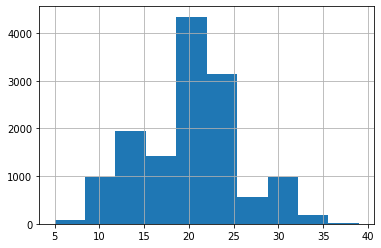

count    13666.000000
mean        20.415264
std          5.267803
min          5.000000
25%         17.000000
50%         21.000000
75%         25.000000
max         39.000000
dtype: float64

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
polb_reviews_len = [len(x) for x in polb_reviews_int]
pd.Series(polb_reviews_len).hist()
plt.show()
pd.Series(polb_reviews_len).describe()

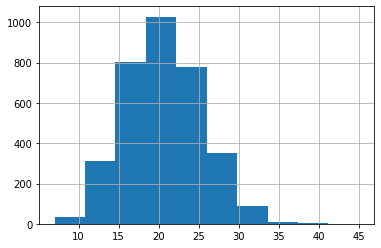

count    3404.000000
mean       20.420388
std         5.334077
min         7.000000
25%        17.000000
50%        21.000000
75%        25.000000
max        45.000000
dtype: float64

In [100]:
%matplotlib inline
polb_test_reviews_len = [len(x) for x in polb_test_reviews_int]
pd.Series(polb_test_reviews_len).hist()
plt.show()
pd.Series(polb_test_reviews_len).describe()

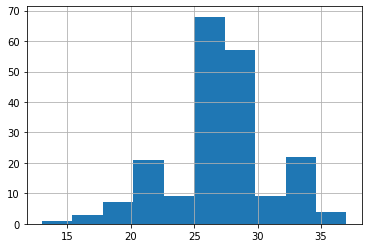

count    201.000000
mean      26.756219
std        4.199437
min       13.000000
25%       25.000000
50%       27.000000
75%       29.000000
max       37.000000
dtype: float64

In [101]:
%matplotlib inline
polb_test1_reviews_len = [len(x) for x in polb_test1_reviews_int]
pd.Series(polb_test1_reviews_len).hist()
plt.show()
pd.Series(polb_test1_reviews_len).describe()

In [0]:
polb_reviews_int = [ polb_reviews_int[i] for i, l in enumerate(polb_reviews_len) if l>0 ]
polb_encoded_labels = [ polb_encoded_labels[i] for i, l in enumerate(polb_reviews_len) if l> 0 ]

In [0]:
polb_test_reviews_int = [ polb_test_reviews_int[i] for i, l in enumerate(polb_test_reviews_len) if l>0 ]
polb_test_encoded_labels = [ polb_test_encoded_labels[i] for i, l in enumerate(polb_test_reviews_len) if l> 0 ]

In [0]:
polb_test1_reviews_int = [ polb_test1_reviews_int[i] for i, l in enumerate(polb_test1_reviews_len) if l>0 ]
polb_test1_encoded_labels = [ polb_test1_encoded_labels[i] for i, l in enumerate(polb_test1_reviews_len) if l> 0 ]

In [0]:
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [106]:
polb_features = pad_features(polb_reviews_int, 200)
print (polb_features[:10,:])
print (len(polb_reviews_int))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
13666


In [107]:
polb_test_features = pad_features(polb_test_reviews_int, 200)
print (polb_test_features[:10,:])
print (len(polb_test_reviews_int))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
3404


In [108]:
polb_test1_features = pad_features(polb_test1_reviews_int, 200)
print (polb_test1_features[:10,:])
print (len(polb_test1_reviews_int))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
201


In [109]:
import torch
from torch.utils.data import DataLoader, TensorDataset
split_frac = 0.8
len_feat = len(polb_reviews_int)
polb_train_x = torch.from_numpy(np.asarray(polb_features[0:int(split_frac*len_feat)]))
print (polb_train_x)
polb_train_y = torch.from_numpy(np.asarray(polb_encoded_labels[0:int(split_frac*len_feat)]))
print (polb_train_y)
print (type(polb_train_y[:1]))
polb_valid_x = torch.from_numpy(np.asarray(polb_features[int(split_frac*len_feat):]))
print (polb_valid_x)
polb_valid_y = torch.from_numpy(np.asarray(polb_encoded_labels[int(split_frac*len_feat):]))
print (polb_valid_y)

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])
tensor([1, 1, 1,  ..., 0, 0, 0])
<class 'torch.Tensor'>
tensor([[   0,    0,    0,  ...,    0,    0,    0],
        [   0,    0,    0,  ...,    0,    0,    0],
        [   0,    0,    0,  ...,    0,    0,    0],
        ...,
        [   0,    0,    0,  ...,    0,    0,    0],
        [   0,    0,    0,  ...,    0,    0,    0],
        [   0,    0,    0,  ..., 8666,    0, 8667]])
tensor([1, 1, 0,  ..., 0, 0, 0])


In [110]:
transform = transforms.Compose([
        transforms.Resize(256),
        transforms.RandomCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 

NameError: ignored

In [111]:
split_frac1 = 1
len_feat1 = len(polb_test_reviews_int)
polb_test_x = torch.from_numpy(np.asarray(polb_test_features[0:int(split_frac1*len_feat1)]))
print (polb_test_x)
polb_test_y = torch.from_numpy(np.asarray(polb_test_encoded_labels[0:int(split_frac1*len_feat1)]))
print (polb_test_y)

tensor([[   0,    0,    0,  ...,    0,    0,    0],
        [   0,    0,    0,  ...,    0,    0,    0],
        [   0,    0,    0,  ...,    0,    0,    0],
        ...,
        [   0,    0,    0,  ...,    0,    0,    0],
        [   0,    0,    0,  ...,    0,    0,    0],
        [   0,    0,    0,  ...,  396,    0, 3858]])
tensor([1, 1, 1,  ..., 1, 1, 0])


In [112]:
split_frac1 = 1
len_feat1 = len(polb_test1_reviews_int)
polb_test1_x = torch.from_numpy(np.asarray(polb_test1_features[0:int(split_frac1*len_feat1)]))
print (polb_test1_x)
polb_test1_y = torch.from_numpy(np.asarray(polb_test1_encoded_labels[0:int(split_frac1*len_feat1)]))
print (polb_test1_y)

tensor([[  0,   0,   0,  ...,   0,   0,   0],
        [  0,   0,   0,  ...,   0,   0,   0],
        [  0,   0,   0,  ...,   0,   0,   0],
        ...,
        [  0,   0,   0,  ...,   0,   0,   0],
        [  0,   0,   0,  ...,   0,   0,   0],
        [  0,   0,   0,  ..., 859,   0, 860]])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0])


In [113]:
# create Tensor datasets
polb_train_data = TensorDataset(polb_train_x, polb_train_y)
polb_valid_data = TensorDataset(polb_valid_x, polb_valid_y)
polb_test_data = TensorDataset(polb_test_x, polb_test_y)
polb_test1_data = TensorDataset(polb_test1_x, polb_test1_y)
# dataloaders
batch_size = 50
# make sure to SHUFFLE your data
polb_train_loader = DataLoader(polb_train_data, shuffle=True, batch_size=batch_size, drop_last=True)
print (polb_train_loader)
polb_valid_loader = DataLoader(polb_valid_data, shuffle=True, batch_size=batch_size, drop_last=True)
print (polb_valid_loader)
polb_test_loader = DataLoader(polb_test_data, shuffle=True, batch_size=batch_size, drop_last=True)
print (polb_test_loader)
polb_test1_loader = DataLoader(polb_test1_data, shuffle=True, batch_size=batch_size, drop_last=True)
print (polb_test1_loader)

In [114]:
# obtain one batch of training data
polb_dataiter = iter(polb_train_loader)
sample_x, sample_y = polb_dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 200])
Sample input: 
 tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 0])


In [115]:
# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Training on GPU.


In [0]:
import torch.nn as nn

class sarcasticLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(sarcasticLSTM, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
          hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
          hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [117]:
# Instantiate the model w/ hyperparams
vocab_size = len(polb_vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 512
n_layers = 10
net = sarcasticLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

sarcasticLSTM(
  (embedding): Embedding(8673, 400)
  (lstm): LSTM(400, 512, num_layers=10, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=512, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [0]:
lr=0.0001
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [119]:
# training params

epochs = 4 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
  net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in polb_train_loader:
        counter += 1

        if(train_on_gpu):
          inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in polb_valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                  inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/4... Step: 100... Loss: 0.691406... Val Loss: 0.693530
Epoch: 1/4... Step: 200... Loss: 0.695234... Val Loss: 0.693256
Epoch: 2/4... Step: 300... Loss: 0.693886... Val Loss: 0.693130
Epoch: 2/4... Step: 400... Loss: 0.694024... Val Loss: 0.693142
Epoch: 3/4... Step: 500... Loss: 0.692464... Val Loss: 0.693515
Epoch: 3/4... Step: 600... Loss: 0.693426... Val Loss: 0.693147
Epoch: 4/4... Step: 700... Loss: 0.693789... Val Loss: 0.693145
Epoch: 4/4... Step: 800... Loss: 0.694036... Val Loss: 0.693165


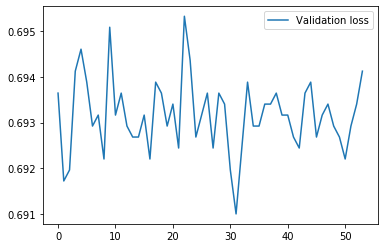

In [120]:
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()

In [121]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in polb_test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(polb_test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.693
Test accuracy: 0.499


In [0]:
# Get test data loss and accuracy

test1_losses = [] # track loss
num_correct = 0
nav = 0
test1_out = []

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in polb_test1_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    output, h = net(inputs, h)
    
    # calculate loss
    #test1_loss = criterion(output.squeeze(), labels.float())
    #test1_losses.append(test1_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    test1_out.append(pred.tolist())
    
    
    # compare predictions to true label
    #correct_tensor = pred.eq(labels.float().view_as(pred))
    #correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    #num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
#print("Test1 loss: {:.3f}".format(np.mean(test1_losses)))

# accuracy over all test data
#test1_acc = num_correct/len(polb_test1_loader.dataset)
#print("Test accuracy: {:.3f}".format(test1_acc))

In [205]:
print (test1_out)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [206]:
from functools import reduce
import operator
test2_out = reduce(operator.concat, test1_out)
print (len(test2_out))

200


In [207]:
print (test2_out)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [208]:
pol_test_balanced_1.head()

Textual data for sarcasm detection  Your Predicted label
0  passengers praying uber just a hobby for elder...                   NaN
1          the top 10 workout songs for january 2018                   NaN
2  meryl streep looks exactly like the 'shrek' fa...                   NaN
3  couple just wants small ceremony in public par...                   NaN
4  terrified fda warns something making bananas b...                   NaN

In [0]:
test1_df = pd.DataFrame({'col':test2_out})

In [210]:
test1_df.head()

col
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0

In [0]:
pol_test_balanced_2 = pol_test_balanced_1
pol_test_balanced_2["Your Predicted label"] = test1_df["col"]

In [212]:
pol_test_balanced_2.head()

Textual data for sarcasm detection  Your Predicted label
0  passengers praying uber just a hobby for elder...                   0.0
1          the top 10 workout songs for january 2018                   0.0
2  meryl streep looks exactly like the 'shrek' fa...                   0.0
3  couple just wants small ceremony in public par...                   0.0
4  terrified fda warns something making bananas b...                   0.0

In [0]:
pol_test_balanced_2.to_csv("/content/gdrive/My Drive/HCLHackathon/Pol/Mahesh_51518487_Saracasm_dataset_without_labels.csv", index = False)

In [0]:
from pandas import ExcelWriter

writer = ExcelWriter('/content/gdrive/My Drive/HCLHackathon/Pol/Mahesh_51518487_Saracasm_dataset_without_labels.xlsx')
pol_test_balanced_2.to_excel(writer,'Sheet1', index = False)
writer.save()